Intro to the notebook

Intro to background concepts: qubits, gates, entanglement

Intro to the game: rules, gameplay

In [3]:
#This code imports packages that will be used later on, allowing us to build off publicly available code

#Import Qiskit, IBM's software development kit (SDK) for quantum computing
from qiskit import *

#Import helpful Python packages
import numpy as np
import random
import ipywidgets as widg

In [5]:
#This code creates the widgets that allow you to select your partner's strategy

#Create a variable to store the strategy you chose for your partner
partner_strategy = 0

#Create a dropdown menu to choose your partner's strategy
strat_dropdown = widg.Dropdown(
    options = [('Play a 0 or 1 at Random', 0), ('Play the Number They Received', 1), ('Always Play 0', 2), ('Always Play 1', 3)],
    value = 0,
    description = 'Choose Partner\'s Strategy',
    disabled = False
)

#Create a button to confirm your choice
strat_confirm = widg.Button(
    description='Select Strategy',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to Confirm Your Choice',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

#Define what happens when you click the button
def sc_click (button):
    global partner_strategy 
    partner_strategy = strat_dropdown.value
    button.button_style = 'success'
    print("Your partner's strategy has been chosen. Now, play a few games!")

strat_confirm.on_click(sc_click)

#Display the dropdown menu and button
print("First, select your partner's strategy from the dropdown.")
display(strat_dropdown)
display(strat_confirm)

First, select your partner's strategy from the dropdown.


Dropdown(description="Choose Partner's Strategy", options=(('Play a 0 or 1 at Random', 0), ('Play the Number T…

Button(description='Select Strategy', icon='check', style=ButtonStyle(), tooltip='Click to Confirm Your Choice…

In [ ]:
#This code runs the CHSH game with a classical strategy

#Create a variable to store the number of games to be played
num_games = 10

#Create a variable to store the number of games won
num_wins = 0

#Create a progress bar to show how many games you've played
response_progress = widg.IntProgress(
    value=0,
    min=0,
    max=10,
    description='Games Played:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'green'},
    orientation='horizontal'
)

display(response_progress)

#Loop through the number of games to be played
for i in range(num_games):
    
    #Create a variable for the number alice and bob are given, either 0 or 1
    alice_input = random.randint(0, 1)
    bob_input = random.randint(0, 1)
    
    #Create a variable for the number alice responds with
    alice_output = 0
    
    #Set that variable based on the strategy the user selected
    if (partner_strategy == 0):
        alice_output = random.randint(0, 1)
    elif (partner_strategy == 1):
        alice_output = alice_input
    elif (partner_strategy == 2):
        alice_output = 0
    elif (partner_strategy == 3):
        alice_output = 1
         
    #Create a variable for the number you respond with, based on your input
    bob_output = int(input("You received " + str(bob_input) + ". Enter a 0 or 1 as a response."))
    
    #Ensure the user gave a valid answer
    while (bob_output != 0 and bob_output != 1):
        print("That was not a valid response.")
        bob_output = int(input("Please enter a 0 or a 1."))
    
    #Move the progress bar along to show your progress
    response_progress.value += 1
    
    #Display you and your partner's responses
    print("Your partner's input was " + str(alice_input) + " and yours was " + str(bob_input) + ".")
    print("Your partner returned " + str(alice_output) + " and you returned " + str(bob_output) + ".")
    
    #Use an 'if' statement to check whether you met the win condition
    if ((alice_output + bob_output) % 2 == alice_input * bob_input):
        
        #If so, increase the number of wins by one
        num_wins += 1
        print("You won! \n")
    
    else:
        print("You lost. \n")

#Display the number of games you and your partner won
print("You won " + str(num_wins) + " out of 10 games.")
if (num_wins < 3):
    print("Consider trying a different strategy.")
elif (num_wins < 5):
    print("Better luck next time!")
elif (num_wins < 8):
    print("Not too shabby!")
else:
    print("You crushed it!")

introduce the quantum strategy, tell what the partner is going to do

In [7]:
#This code runs the CHSH game with a quantum strategy

#Create a variable to store the number of games to be played
num_games_q = 10

#Create a variable to store the number of games won
num_wins_q = 0

#Create a progress bar to show how many games you've played
response_progress_q = widg.IntProgress(
    value=0,
    min=0,
    max=10,
    description='Games Played:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    style={'bar_color': 'green'},
    orientation='horizontal'
)

display(response_progress_q)

#Create a simulator via Qiskit
backend_sim = Aer.get_backend("qasm_simulator")

#Loop through the number of games to be played
for i in range(num_games_q):
    
    #Create a quantum register, specifying how many qubits will be used in the circuit
    reg_q = QuantumRegister(2, name = "q")
    
    #Create a classical register, specifying how many classical bits will be used in the circuit
    reg_c = ClassicalRegister(2, name = "c")
    
    #Create the complete circuit, composed of the two registers
    circ = QuantumCircuit(reg_q, reg_c, name = "circ")
    
    #There are two steps in the typical process of creating an entangled state:
    #First, create a Hadamard gate on one of the qubits
    circ.h(reg_q[0])
    
    #Second, create a CNOT gate from the qubit with the H gate to the other
    circ.cx(reg_q[0], reg_q[1])
    
    #Create a variable for the number alice and bob are given, either 0 or 1
    alice_input = random.randint(0, 1)
    bob_input = random.randint(0, 1)
    
    #Your partner creates a gate based on the predetermined strategy
    if (alice_input == 0):
        
        #Does nothing and goes straight to measurement if given 0
        pass
    else:
        #Creates a hadamard gate on the first quantum register if given 1
        circ.h(reg_q[0])
    
    #Measure your partner's qubit and store the result in a classical bit
    circ.measure(reg_q[0], reg_c[0])
    
    #Create variables to store the angles the user may use
    angle_0 = np.pi/8
    angle_1 = -np.pi/8
    
    
    #Prompt the user to confirm their choice
    print("You received a " + str(bob_input) + ". Choose which gate to apply.", flush = True)
    
    #Create a button widget to prompt the user for which gate to apply
    gate_button = widg.RadioButtons(
        options=[("Apply the Gate for 0", 0), ("Apply the Gate for 1", 1), ("Just Measure", 2)],
        value = 0,
        description = "Choose Which Gate to Apply",
        disabled = False
    )
        
    gate_button.layout.object_position = "bottom"
    
    display(gate_button)
    
    input("Press enter once you have made your choice")
    
    
    gate_chosen = gate_button.value
        
    #Apply the gate chosen by the user
    if (gate_chosen == 0):
        #Create the unitary gate, tuned to the angle pi/8
        user_gate = np.array([[np.cos(angle_0), np.sin(angle_0)], 
                               [np.sin(angle_0), -np.cos(angle_0)]])
            
        #Apply the unitary gate to the shared qubit
        circ.unitary(user_gate, range(1))
            
    elif (gate_chosen == 1):
        #Create the unitary gate, tuned to the angle -pi/8
        user_gate = np.array([[np.cos(angle_1), np.sin(angle_1)], 
                               [np.sin(angle_1), -np.cos(angle_1)]])
            
        #Apply the unitary gate to the shared qubit
        circ.unitary(user_gate, range(1))
    
    #Measure the user's qubit and store the result in a classical bit
    circ.measure(reg_q[1], reg_c[1])
        
    #Execute the simulation
    sim = execute(circ, backend = backend_sim, shots = 1)
        
    #Store the results of the simulation in a variable
    res = sim.result()
        
    #Get the responses from the results
    outcome = res.get_counts(circ)
        
    #Set alice and bob's responses based on the outcome
    alice_output = int(list(outcome.keys())[0][0])
    bob_output = int(list(outcome.keys())[0][1])
        
    #Move the progress bar along to show your progress
    response_progress_q.value += 1

    #Display you and your partner's responses
    print("\nYour partner's input was " + str(alice_input) + " and yours was " + str(bob_input) + ".")
    print("Your partner returned " + str(alice_output) + " and you returned " + str(bob_output) + ".")

    #Use an 'if' statement to check whether you met the win condition
    if ((alice_output + bob_output) % 2 == alice_input * bob_input):

        #If so, increase the number of wins by one
        num_wins_q += 1
        print("You won! \n \n")

    else:
        print("You lost. \n \n")
    
#Display the number of games you and your partner won
print("You won " + str(num_wins_q) + " out of 10 games.")
if (num_wins_q < 3):
    print("Consider trying a different strategy.")
elif (num_wins_q < 5):
    print("Better luck next time!")
elif (num_wins_q < 8):
    print("Not too shabby!")
else:
    print("You crushed it!")
    

IntProgress(value=0, description='Games Played:', max=10, style=ProgressStyle(bar_color='green'))

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice0

Your partner's input was 0 and yours was 0.
Your partner returned 1 and you returned 1.
You won! 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice

Your partner's input was 0 and yours was 0.
Your partner returned 0 and you returned 0.
You won! 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice

Your partner's input was 0 and yours was 0.
Your partner returned 0 and you returned 0.
You won! 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice

Your partner's input was 1 and yours was 0.
Your partner returned 0 and you returned 0.
You won! 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice

Your partner's input was 1 and yours was 0.
Your partner returned 0 and you returned 1.
You lost. 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice

Your partner's input was 1 and yours was 0.
Your partner returned 1 and you returned 1.
You won! 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

Press enter once you have made your choice

Your partner's input was 1 and yours was 0.
Your partner returned 0 and you returned 0.
You won! 
 

You received a 0. Choose which gate to apply.


RadioButtons(description='Choose Which Gate to Apply', layout=Layout(object_position='bottom'), options=(('App…

KeyboardInterrupt: Interrupted by user

In [ ]:
#This code simulates the CHSH game with the optimal classical strategy 1000 times

#Create a variable to store the number of games to be played
num_games = 1000

#Create a variable to store the number of games won
num_wins = 0

#Loop through the number of games to be played
for i in range(num_games):
    
    #Create a variable for the number alice and bob are given, either 0 or 1
    alice_input = random.randint(0, 1)
    bob_input = random.randint(0, 1)
    
    #Create a variable for the number alice and bob responds with. In the optimal classical strategy, this is 0
    alice_output = 0
    bob_output = 0

    #Use an 'if' statement to check whether you met the win condition
    if ((alice_output + bob_output) % 2 == alice_input * bob_input):
        
        #If so, increase the number of wins by one
        num_wins += 1

#Display the number of games alice and bob won
print("With the optimal classical strategy, alice and bob won " + str(num_wins) + " out of " + str(num_games) + " games.")
print("We expect them to win 75% of the time with the optimal classical strategy. That's pretty good, but the quantum strategy can do better.")

In [ ]:
#This code simulates the CHSH game with the optimal quantum strategy 1000 times

#Create a variable to store the number of games to be played
num_games_q = 1000

#Create a variable to store the number of games won
num_wins_q = 0

#Create a simulator via Qiskit
backend_sim = Aer.get_backend('qasm_simulator')

print("Simulating quantum games. This may take a moment.")

#Loop through the number of games to be played
for i in range(num_games_q):
    
    #Create a quantum register, specifying how many qubits will be used in the circuit
    reg_q = QuantumRegister(2, name = "q")
    
    #Create a classical register, specifying how many classical bits will be used in the circuit
    reg_c = ClassicalRegister(2, name = "c")
    
    #Create the complete circuit, composed of the two registers
    circ = QuantumCircuit(reg_q, reg_c, name = "circ")
    
    #There are two steps in the typical process of creating an entangled state:
    #First, create a Hadamard gate on one of the qubits
    circ.h(reg_q[0])
    
    #Second, create a CNOT gate from the qubit with the H gate to the other
    circ.cx(reg_q[0], reg_q[1])
    
    #Create a variable for the number alice and bob are given, either 0 or 1
    alice_input = random.randint(0, 1)
    bob_input = random.randint(0, 1)
    
    #Alice creates a gate based on the predetermined strategy
    if (alice_input == 0):
        
        #Does nothing and goes straight to measurement if given 0
        pass
    else:
        #Creates a hadamard gate on the first quantum register if given 1
        circ.h(reg_q[0])
    
    #Create variables to store the angles the user may use
    angle_0 = np.pi/8
    angle_1 = -np.pi/8

    #Apply the optimal gate
    if (bob_input == 0):
        #Create the unitary gate, tuned to the angle pi/8
        gate = np.array([[np.cos(angle_0), np.sin(angle_0)], 
                               [np.sin(angle_0), -np.cos(angle_0)]])
            
        #Apply the unitary gate to the shared qubit
        circ.unitary(gate, reg_q[1])
            
    elif (bob_input == 1):
        #Create the unitary gate, tuned to the angle -pi/8
        gate = np.array([[np.cos(angle_1), np.sin(angle_1)], 
                               [np.sin(angle_1), -np.cos(angle_1)]])
            
        #Apply the unitary gate to the shared qubit
        circ.unitary(gate, reg_q[1])
    
    #Measure the two qubits and store the results in classical bits
    circ.measure(reg_q[0], reg_c[0])
    circ.measure(reg_q[1], reg_c[1])
        
    #Execute the simulation
    sim = execute(circ, backend = backend_sim, shots = 1)
        
    #Store the results of the simulation in a variable
    res = sim.result()
        
    #Get the responses from the results
    outcome = res.get_counts(circ)
        
    #Set alice and bob's responses based on the outcome
    alice_output = int(list(outcome.keys())[0][0])
    bob_output = int(list(outcome.keys())[0][1])
        

    #Use an 'if' statement to check whether you met the win condition
    if ((alice_output + bob_output) % 2 == alice_input * bob_input):

        #If so, increase the number of wins by one
        num_wins_q += 1
            
#Display the number of games alice and bob won
print("With the optimal quantum strategy, alice and bob won " + str(num_wins_q) + " out of " + str(num_games_q) + " games.")
print("We expect them to win 85% of the time with the optimal quantum strategy, a significant improvement from their classical strategy.")

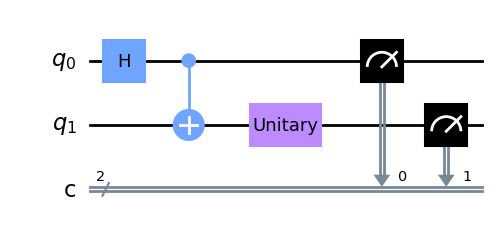

In [12]:
#This cell draws the circuit that alice and bob used to increase their win percentage.

#Define the quantum and classical registers and construct the circuit
reg_q = QuantumRegister(2, name = "q")
reg_c = ClassicalRegister(2, name = "c")
circ = QuantumCircuit(reg_q, reg_c, name = "circ")
    
#Apply a Hadamard gate to the first quantum register
circ.h(reg_q[0])
    
#Apply a controlled-not (CNOT) gate from the first to the second quantum register
circ.cx(reg_q[0], reg_q[1])
    
#Create our custom unitary gate on the second quantum register
angle_0 = np.pi/8
gate = np.array([[np.cos(angle_0), np.sin(angle_0)], 
                [np.sin(angle_0), -np.cos(angle_0)]])
circ.unitary(gate, reg_q[1])

#Measure each quantum register, bringing its result to the corresponding classical register
circ.measure(reg_q[0], reg_c[0])
circ.measure(reg_q[1], reg_c[1])
    
#Use qiskit's built in "draw" function to produce a sketch of the circuit
circ.draw(output = "mpl")